# 1. Unimodal and symmetric


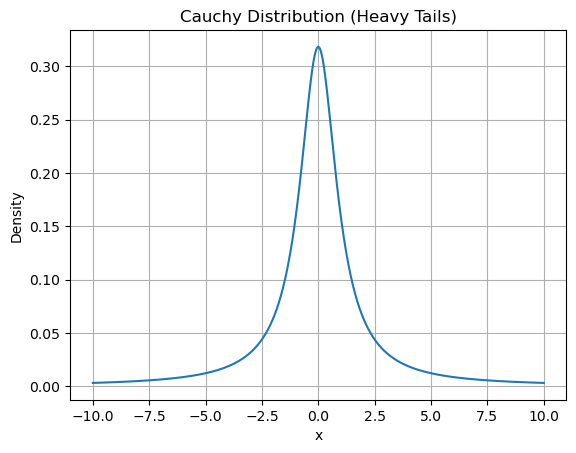

In [11]:
from scipy.stats import cauchy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import t
from scipy.stats import laplace


x = np.linspace(-10, 10, 1000)
pdf = cauchy.pdf(x, loc=0, scale=1)

plt.plot(x, pdf)
plt.title("Cauchy Distribution (Heavy Tails)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()


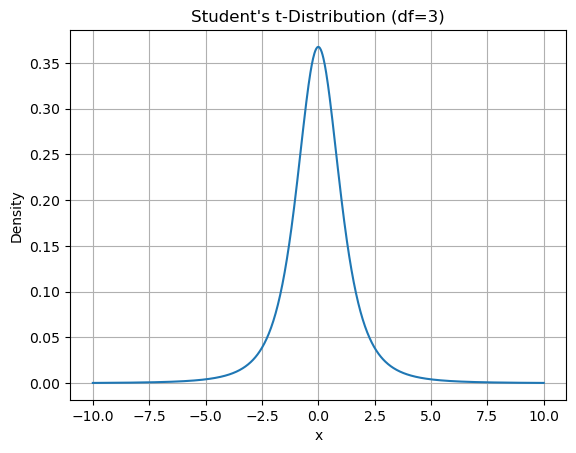

In [12]:
# Generate x values
x = np.linspace(-10, 10, 1000)

# Choose degrees of freedom (e.g., df=3)
df = 3

# Compute PDF for Student's t-distribution
pdf_t = t.pdf(x, df=df)

# Plot
plt.plot(x, pdf_t)
plt.title(f"Student's t-Distribution (df={df})")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

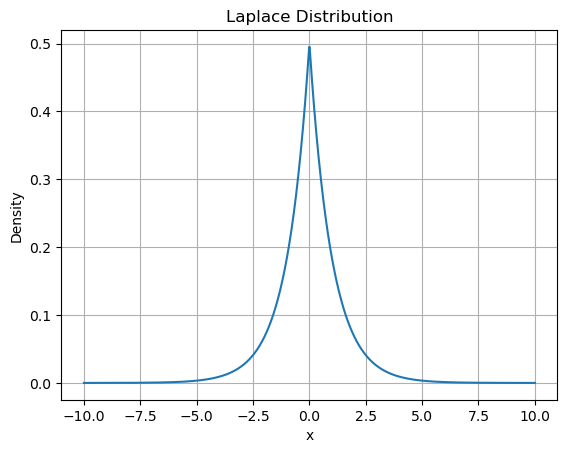

In [13]:
# Generate x values
x = np.linspace(-10, 10, 1000)

# Compute PDF for Laplace distribution (loc=0, scale=1 by default)
pdf_laplace = laplace.pdf(x, loc=0, scale=1)

# Plot
plt.plot(x, pdf_laplace)
plt.title("Laplace Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# 2. High Dimensional and Correlated

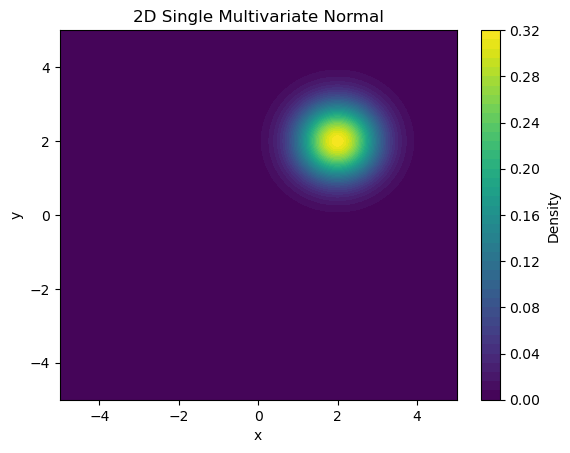

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# Create meshgrid
x, y = np.meshgrid(np.linspace(-5, 5, 200),
                   np.linspace(-5, 5, 200))
pos = np.dstack((x, y))

# Define the first multivariate normal
rv1 = multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]])

# Evaluate the PDF for rv1 only
pdf_rv1 = rv1.pdf(pos)

# Plot contour
plt.contourf(x, y, pdf_rv1, levels=50)
plt.title("2D Single Multivariate Normal")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Density")
plt.show()


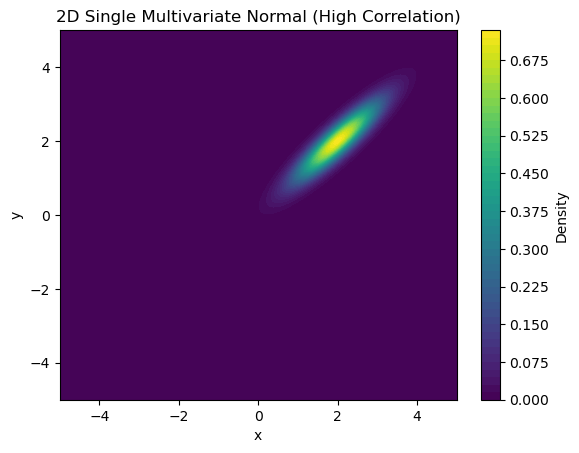

In [15]:
# Create meshgrid
x, y = np.meshgrid(np.linspace(-5, 5, 200),
                   np.linspace(-5, 5, 200))
pos = np.dstack((x, y))

# Define a highly correlated multivariate normal (correlation ~ 0.9)
mean = [2, 2]
cov = [[0.5, 0.45],
       [0.45, 0.5]]
rv = multivariate_normal(mean, cov)

# Evaluate the PDF
pdf = rv.pdf(pos)

# Plot contour
plt.contourf(x, y, pdf, levels=50)
plt.title("2D Single Multivariate Normal (High Correlation)")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Density")
plt.show()

# 3. Multimodal

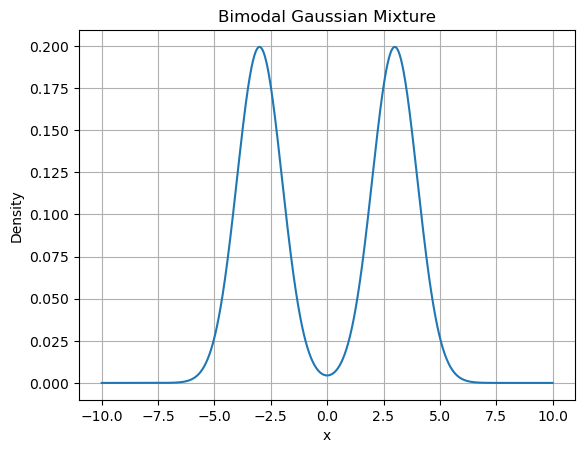

In [16]:

x = np.linspace(-10, 10, 1000)
pdf = 0.5 * np.exp(-(x + 3)**2 / 2) + 0.5 * np.exp(-(x - 3)**2 / 2)
pdf /= np.trapz(pdf, x)  # normalize

plt.plot(x, pdf)
plt.title("Bimodal Gaussian Mixture")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()


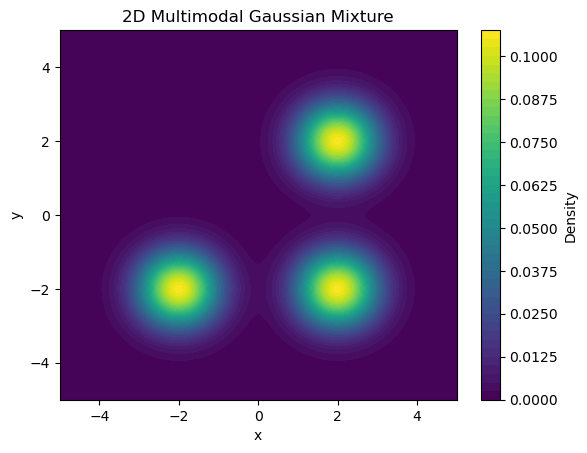

In [17]:


x, y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
pos = np.dstack((x, y))

rv1 = multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]])
rv2 = multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]])
rv3 = multivariate_normal([2, -2], [[0.5, 0], [0, 0.5]])

pdf = 1/3 * rv1.pdf(pos) + 1/3 * rv2.pdf(pos) + 1/3 * rv3.pdf(pos)

plt.contourf(x, y, pdf, levels=50)
plt.title("2D Multimodal Gaussian Mixture")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Density")
plt.show()


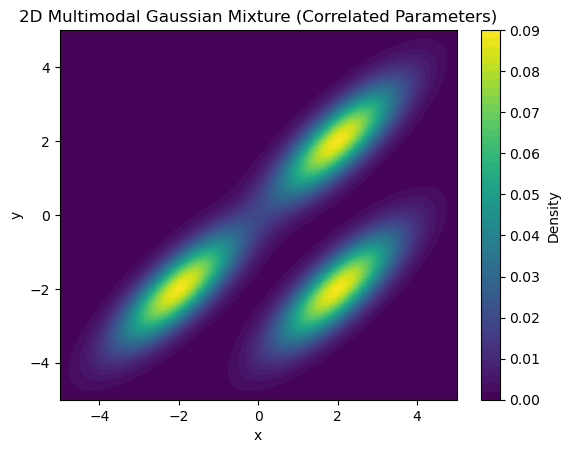

In [18]:

# Create grid
x, y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
pos = np.dstack((x, y))

# Strongly correlated covariance matrices
cov_matrix = [[1, 0.8], [0.8, 1]]  # High correlation

rv1 = multivariate_normal([2, 2], cov_matrix)
rv2 = multivariate_normal([-2, -2], cov_matrix)
rv3 = multivariate_normal([2, -2], cov_matrix)

# Mixture model
pdf = 1/3 * rv1.pdf(pos) + 1/3 * rv2.pdf(pos) + 1/3 * rv3.pdf(pos)

# Plot
plt.contourf(x, y, pdf, levels=50, cmap="viridis")
plt.title("2D Multimodal Gaussian Mixture (Correlated Parameters)")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Density")
plt.show()


# 4. Difficult Geometries

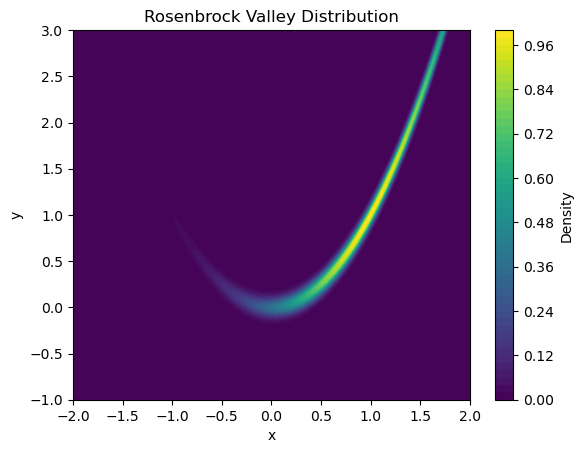

In [19]:
def rosenbrock_density(x, y, a=1, b=100):
    return np.exp(-(a - x)**2 - b * (y - x**2)**2)

x, y = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-1, 3, 300))
pdf = rosenbrock_density(x, y)

plt.contourf(x, y, pdf, levels=50)
plt.title("Rosenbrock Valley Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Density")
plt.show()


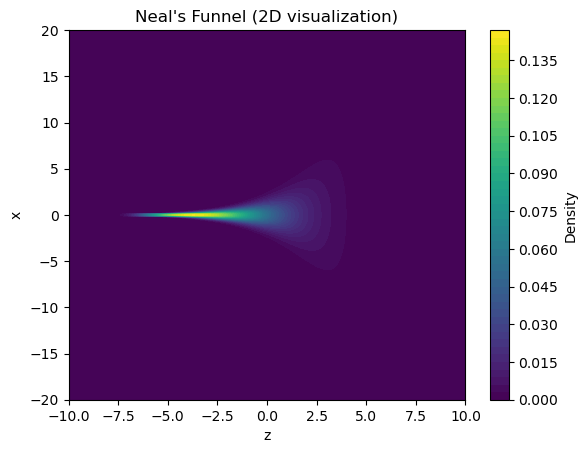

In [20]:
# Define the density of Neal's Funnel
def neals_funnel_density(z, x):
    log_pz = -0.5 * (z / 3)**2 - np.log(3) - 0.5 * np.log(2 * np.pi)
    log_px_given_z = -0.5 * x**2 / np.exp(z) - 0.5 * z - 0.5 * np.log(2 * np.pi)
    return np.exp(log_pz + log_px_given_z)

# Grid
z_vals = np.linspace(-10, 10, 300)
x_vals = np.linspace(-20, 20, 300)
Z, X = np.meshgrid(z_vals, x_vals)

# Evaluate density
pdf = neals_funnel_density(Z, X)

# Plot
plt.contourf(Z, X, pdf, levels=50)
plt.title("Neal's Funnel (2D visualization)")
plt.xlabel("z")
plt.ylabel("x")
plt.colorbar(label="Density")
plt.show()


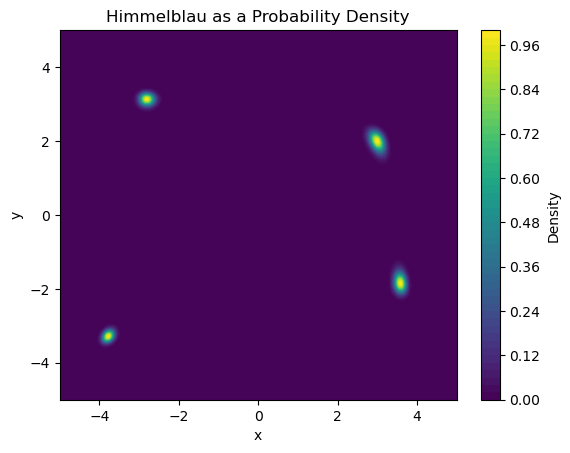

In [21]:


def himmelblau_density(x, y):
    """ Converts Himmelblau function into a probability density. """
    f = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return np.exp(-f)  # Convert to density

# Generate mesh grid
x_vals = np.linspace(-5, 5, 300)
y_vals = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute density
Z = himmelblau_density(X, Y)

# Plot
plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.title("Himmelblau as a Probability Density")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Density")
plt.show()
